In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [13]:
# Importing the dataset
Data = pd.read_csv('C:/Users/Rounak Pyne Study/Desktop/Mall_Customers.csv')
Data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
Data.shape

(200, 5)

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
Data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [21]:
Data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [75]:
X = Data.iloc[:,[3,4]].values

In [76]:
print(X[0:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [80]:
Values = []
for i in range(1,11):
    KM = KMeans(n_clusters=i,init='random',n_init=10,max_iter=300)
    KM.fit(X)
    Values.append(KM.inertia_)

Text(0, 0.5, 'inertia vlues')

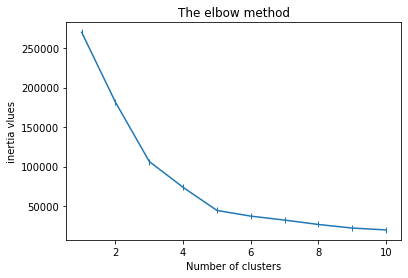

In [87]:
# plot the chart
plt.plot(range(1,11),Values,marker = '|')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia vlues')

In [107]:
# Define K-mean using with 5 clusters 
KM = KMeans(n_clusters=5,init='random',max_iter=300)

In [108]:
# predict cluster 
predictor = KM.fit_predict(X)
print(predictor)
print('Inertia:',KM.inertia_)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]
Inertia: 44448.45544793369


In [109]:
Data['ID']=predictor
Data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ID
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4


No handles with labels found to put in legend.


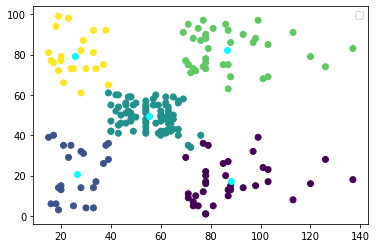

In [112]:
plt.scatter(x=Data['Annual Income (k$)'], y=Data['Spending Score (1-100)'], c=Data['ID'])
plt.legend()
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],c = 'cyan',label = 'Centroids')
plt.show()